In [232]:
!pip install yfinance

In [233]:
import numpy as np
import pandas as pd
import yfinance as yf
from bs4 import BeautifulSoup as bs
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json,requests,time,datetime,requests,sys
from io import StringIO



from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from keras.models import Sequential
from keras.layers import Dense, LSTM

plt.rcParams["figure.figsize"] = (25,8)

In [234]:
ticker='googl'

In [235]:
df=yf.download(tickers=ticker)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [236]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-05,1462.650024,1484.699951,1460.089966,1482.829956,1482.829956,1080100
2020-10-06,1475.500000,1484.520020,1445.010010,1451.020020,1451.020020,1304800
2020-10-07,1459.310059,1468.969971,1433.229980,1459.140015,1459.140015,1805400
2020-10-08,1465.449951,1488.030029,1465.449951,1483.430054,1483.430054,1303800
2020-10-09,1492.859985,1511.849976,1487.000000,1510.449951,1510.449951,1646800


In [237]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4065.000000,4065.000000,4065.000000,4065.000000,4065.000000,4.065000e+03
mean,539.584729,544.661588,534.173108,539.576613,539.576613,6.879486e+06
std,388.744951,392.409972,385.085643,388.996482,388.996482,7.882561e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,5.206000e+05
25%,241.491486,244.439438,239.294296,241.376373,241.376373,1.830200e+06
50%,345.050049,348.123108,340.910919,345.325317,345.325317,4.167000e+06
75%,799.020020,803.539978,793.260010,798.820007,798.820007,8.683300e+06
max,1699.520020,1726.099976,1660.189941,1717.390015,1717.390015,8.215110e+07


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4065 entries, 2004-08-19 to 2020-10-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4065 non-null   float64
 1   High       4065 non-null   float64
 2   Low        4065 non-null   float64
 3   Close      4065 non-null   float64
 4   Adj Close  4065 non-null   float64
 5   Volume     4065 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 222.3 KB


In [239]:
dataset=df.drop(columns=['High','Low','Close','Adj Close','Volume'])

In [240]:
dataset.head()

,Open
Date,
2004-08-19,50.050049
2004-08-20,50.555557
2004-08-23,55.430431
2004-08-24,55.675674
2004-08-25,52.532532


In [241]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4065 entries, 2004-08-19 to 2020-10-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4065 non-null   float64
dtypes: float64(1)
memory usage: 63.5 KB


In [242]:
ds=dataset.reset_index()

In [243]:
ds.head()

,Date,Open
0,2004-08-19,50.050049
1,2004-08-20,50.555557
2,2004-08-23,55.430431
3,2004-08-24,55.675674
4,2004-08-25,52.532532


In [244]:
arr=ds.values

In [245]:
arr

array([[Timestamp('2004-08-19 00:00:00'), 50.050048828125],
       [Timestamp('2004-08-20 00:00:00'), 50.55555725097656],
       [Timestamp('2004-08-23 00:00:00'), 55.4304313659668],
       ...,
       [Timestamp('2020-10-07 00:00:00'), 1459.31005859375],
       [Timestamp('2020-10-08 00:00:00'), 1465.449951171875],
       [Timestamp('2020-10-09 00:00:00'), 1492.8599853515625]],
      dtype=object)

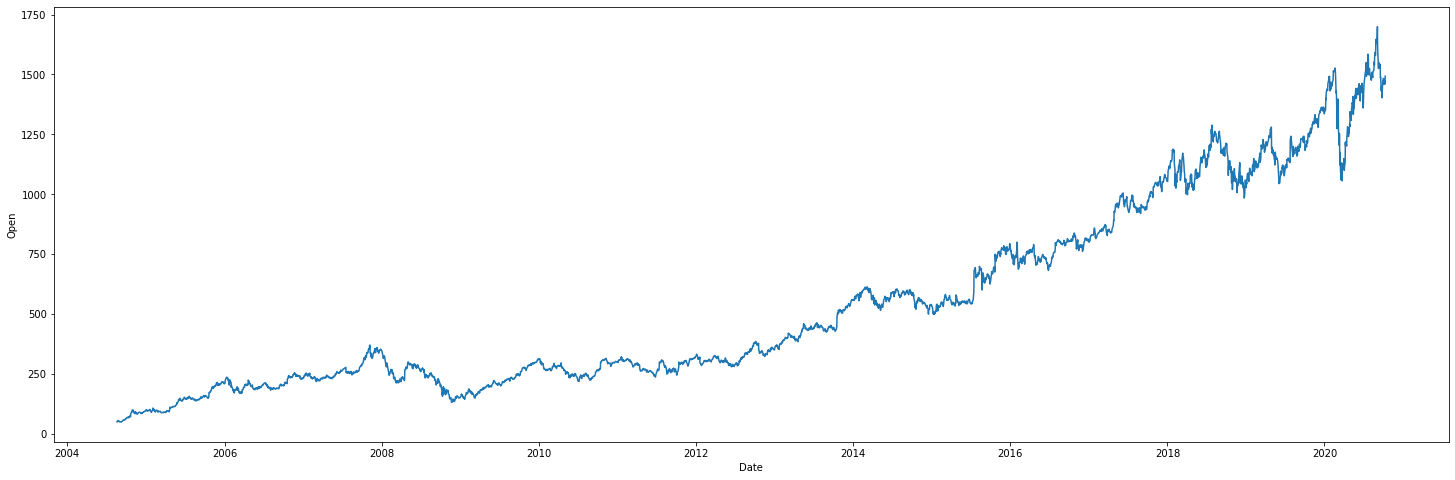

In [246]:
_=sns.lineplot(x=dataset.index,y=dataset.Open)

In [247]:
ds.tail()

,Date,Open
4060,2020-10-05,1462.650024
4061,2020-10-06,1475.500000
4062,2020-10-07,1459.310059
4063,2020-10-08,1465.449951
4064,2020-10-09,1492.859985


In [248]:
arr=dataset.reset_index().values
arr

array([[Timestamp('2004-08-19 00:00:00'), 50.050048828125],
       [Timestamp('2004-08-20 00:00:00'), 50.55555725097656],
       [Timestamp('2004-08-23 00:00:00'), 55.4304313659668],
       ...,
       [Timestamp('2020-10-07 00:00:00'), 1459.31005859375],
       [Timestamp('2020-10-08 00:00:00'), 1465.449951171875],
       [Timestamp('2020-10-09 00:00:00'), 1492.8599853515625]],
      dtype=object)

In [249]:
X = arr[:, 0]
Y = arr[:, 1]
arr.shape

(4065, 2)

In [250]:
X.shape

(4065,)

In [251]:
train_size=int(arr.shape[0]*0.75)
train_size

3048

In [252]:
validation_size=int(arr.shape[0]*0.15)
validation_size

609

In [253]:
test_size=arr.shape[0]-(train_size+validation_size)
test_size

408

In [254]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[2.45717430e-04],
       [5.52109314e-04],
       [3.50680165e-03],
       ...,
       [8.54407209e-01],
       [8.58128637e-01],
       [8.74742034e-01]])

In [255]:
training_data=scaled_data[:train_size,:]
training_data.shape

(3048, 1)

In [256]:
training_data

array([[2.45717430e-04],
       [5.52109314e-04],
       [3.50680165e-03],
       ...,
       [4.60856236e-01],
       [4.63971631e-01],
       [4.60747141e-01]])

In [257]:
def prepare_x(the_data):
  x=[]
  for i in range(120,the_data.shape[0]):
    x.append(the_data[i-120:i,0])
  x=np.array(x)
  X = np.reshape(x, (x.shape[0],x.shape[1],1))
  return X


In [258]:
x_data=df.index[:train_size]
x_data

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2016-09-13', '2016-09-14', '2016-09-15', '2016-09-16',
               '2016-09-19', '2016-09-20', '2016-09-21', '2016-09-22',
               '2016-09-23', '2016-09-26'],
              dtype='datetime64[ns]', name='Date', length=3048, freq=None)

In [259]:
y_train=training_data
y_train

array([[2.45717430e-04],
       [5.52109314e-04],
       [3.50680165e-03],
       ...,
       [4.60856236e-01],
       [4.63971631e-01],
       [4.60747141e-01]])

In [260]:
X_train=prepare_x(training_data)
y_train=[]

In [261]:
for i in range(120,training_data.shape[0]):
  y_train.append(training_data[i,0])



In [262]:
#x_train=np.array(x_train)
y_train=np.array(y_train)
x_train.shape

(2928, 120)

In [263]:
#X_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
#X_train.shape

In [264]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [265]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [266]:
model.fit(X_train, y_train, batch_size=1, epochs=2)


Epoch 1/2
2928/2928 [==============================] - 133s 46ms/step - loss: 2.4383e-04
Epoch 2/2
2928/2928 [==============================] - 123s 42ms/step - loss: 1.1389e-04


In [ ]:
test_data = scaled_data[train_size -120:train_size+validation_size, : ]
test_data

In [268]:
x_valid=[]
y_valid=scaled_data[train_size:train_size+validation_size,:]

In [269]:
for i in range(120,test_data.shape[0]):
    x_valid.append(test_data[i-120:i,0])

In [270]:
x_valid=np.array(x_valid)

In [271]:
X_valid = np.reshape(x_valid, (x_valid.shape[0],x_valid.shape[1],1))


In [272]:
X_valid=prepare_x(test_data)

In [273]:
predictions = model.predict(X_valid) 
predictions = scaler.inverse_transform(predictions)

In [274]:
predictions.shape

(609, 1)

In [275]:
rmse=np.sqrt(np.mean(((predictions- y_valid)**2)))
rmse

993.3876551722582

In [276]:
train = dataset[:train_size]
valid = dataset[train_size:train_size+validation_size]
valid['Predictions'] = predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


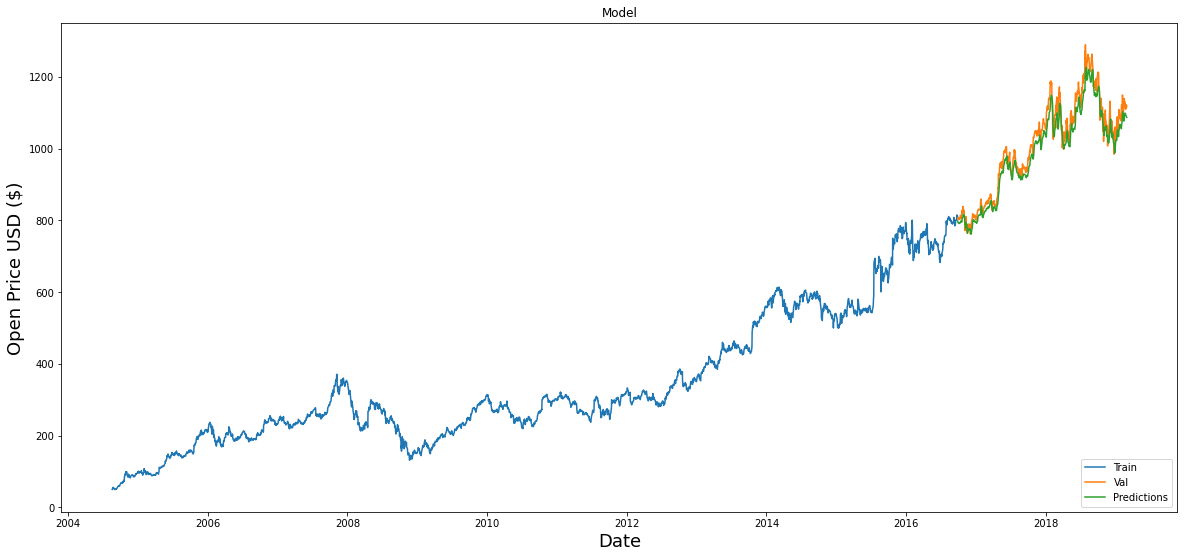

In [277]:
plt.figure(figsize=(20,9))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()